In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
curr_dir=os.getcwd()
#print(curr_dir)
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df=df.drop("index", axis=1)
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [19]:
final_features_method2b = ['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']
len(final_features_method2b)

14

In [20]:
from sklearn.model_selection import train_test_split
y = df["Level"]
X = df.drop(["Patient Id","Level"], axis=1)
X= X[final_features_method2b]
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [21]:
X_train.shape

(700, 14)

### Models selected for classifcation task
For our multiclass classification task, we carefully chose several models to explore different aspects of the predictive performance.

In addition to the SVM model done earlier, we implemented a Logistic Regression model to assess performance against another linear classifier. This comparison helps verify our model's ability to linearly separate data points effectively. 
Furthermore, we incorporated a K-Nearest Neighbors (KNN) model, as it is a simple yet expressive method which is robust to noise.

### Within the model, perform hyperparameter tuning with GridSearchCV so that we can find the most optimal hyperparameter
To ensure optimal model performance, we conducted hyperparameter tuning using scikit-learn's GridSearchCV. This technique exhaustively searched various hyperparameters combintaions we provided to identify the most effective setting of hyperparameter for each model that achieve the highest accuracy. 

In addition to parameter optimization, we utilized k-fold cross-validation during the tuning process, with k=5. This method partitions into k subsets, trainign the model on k-1 subsets and validating it on the remaining subset. This process is repeated for every fold and allows us to obtain a robust estimate of the model's performance by averaging the validation errors across the folds.

#### Model 2: Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [1500]}

def gridsearch_method(model, params, model_name, cv_=5):
    global X_train, X_test, y_train, y_test
    grid=GridSearchCV(model, param_grid=params, cv=cv_)
    grid.fit(X_train, y_train)
    print(f'Best {model_name} hyperparameters: {grid.best_estimator_}')
    print(f'Best {model_name} validation score: {grid.best_score_}')
    y_pred=grid.predict(X_test)
    accuracy_=accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy on test set: {accuracy_}')
    return y_pred

y_pred_logreg=gridsearch_method(model=LogisticRegression(), params= logreg_params, model_name="Logistic Regression")


Best Logistic Regression hyperparameters: LogisticRegression(C=1, max_iter=1500)
Best Logistic Regression validation score: 0.9985714285714286
Logistic Regression accuracy on test set: 1.0


 Precision: 1.00, Recall: 1.00, F1-score: 1.00


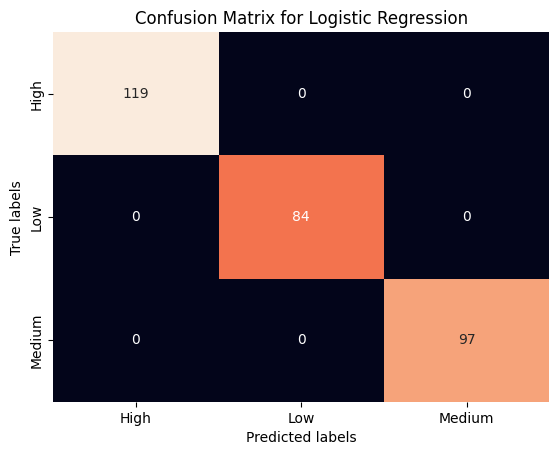

In [23]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def evaluation_metrics(y_true, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_true, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_true, y_pred)
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    
    ax = plt.subplot() 
    sns.heatmap(confusion_scores_matrix, annot=True, fmt='g', ax=ax, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')

    ax.xaxis.set_ticklabels(unique_labels)
    ax.yaxis.set_ticklabels(unique_labels)
    plt.show()

evaluation_metrics(y_test, y_pred_logreg, 'Logistic Regression', average_type='macro')

The output of the confusion matrix for the Logistic Regression is the same as the SVM, where the accuracy, precision, recall, and F1-score metrics for both Logistic Regression and SVM models showcase exceptional performance, with scores of 1.00, indicating perfect classification accuracy on the test set with no misclassifications observed in the confusion matrix. This validates the suitability of using linear models for predicting lung cancer occurrence in the dataset. Moreover, the feature engineering performed on the dataset highlight the effectiveness of the chosen features in capturing relevant information for the classification tasks.

#### Manual exploration for hyperparameters in Logistic Regression to understand the trade-off between bias and variance
Here, we will run the Logistic model for values of C from 0.001 to 100. The performance of the model using accuracy was plot against the values of c to understand the parameters better.

C values: [0.001, 0.01, 0.1, 1, 10, 100]
Training accuracy: [0.9214285714285714, 0.9485714285714286, 0.99, 0.9985714285714286, 1.0, 1.0]
Test accuracy: [0.9166666666666666, 0.9533333333333334, 0.9866666666666667, 1.0, 1.0, 1.0]


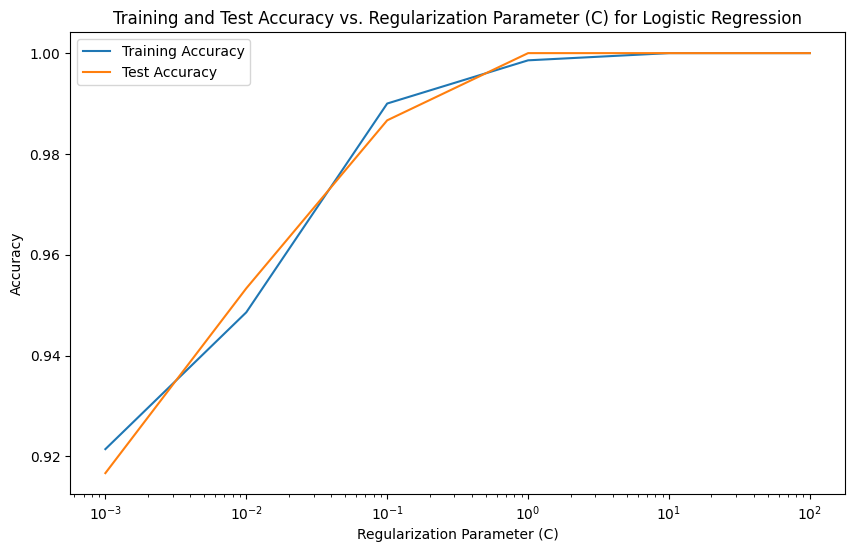

In [24]:

def explore_logistic_regression(C_values):
    global X_train, X_test, y_train, y_test
    train_lst = []
    test_lst = []
    
    for C_value in C_values:
        # Create and fit the logistic regression model
        logreg = LogisticRegression(C=C_value, max_iter=1000)
        logreg.fit(X_train, y_train)
        
        # Compute training error
        train_preds = logreg.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        
        # Compute test error
        test_preds = logreg.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)
        
    # Print errors
    print("C values:", C_values)
    print("Training accuracy:", train_lst)
    print("Test accuracy:", test_lst)
    
    # Plot errors
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, train_lst, label="Training Accuracy")
    plt.plot(C_values, test_lst, label="Test Accuracy")
    plt.xscale('log')  #log scale for C values
    plt.ylabel("Accuracy")
    plt.xlabel("Regularization Parameter (C)")
    plt.title("Training and Test Accuracy vs. Regularization Parameter (C) for Logistic Regression")
    plt.legend()
    plt.show()

# Example usage:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
explore_logistic_regression(C_values)
 

The "C" hyperparameter in the this model controls the strength of the regularisation. A smaller "C" will lead to stronger regularisation, generating  simpler model while a larger "C" will lead to a weaker regularisation, generating a more complex model. <br>

As "C" increases from 0.001 to 100, both training and test accuracy improve. This suggest that when employing a strong regularisation (smaller "C" value), the model will become simpler, exhibiting underfitting, particularly when excessively low "C" values is used. This could be due to the very high bias observed. However, the model maintains relatively high accuracy overall across the "C" values, suggesting it captures underlying patterns well across different "C" values. <br>

Notably, test accuracy peaks between 10 and 100 in "C". The higher spectrum of the "C" values in the graph suggest that weak regularisation in the linear model yields the optimal performance in predicting the classification of our dataset. However, we opted for optimal value of 10, as it is closer to the default value (C=1), aiming to prevent excessively high variance and enhance generalisation performance.

#### Model 3: KNN

In [25]:
knn_params = {'n_neighbors': [3, 5, 7, 9]}
y_pred_knn=gridsearch_method(model=KNeighborsClassifier(), params= knn_params, model_name="KNN")

Best KNN hyperparameters: KNeighborsClassifier(n_neighbors=3)
Best KNN validation score: 0.9971428571428571
KNN accuracy on test set: 0.9966666666666667


The grid-score represents the accuracy score of the validation set which is different from the accuracy score of the test set

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


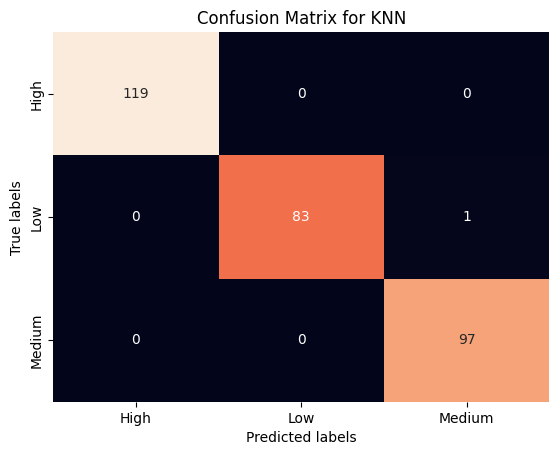

In [26]:

evaluation_metrics(y_test, y_pred_knn, 'KNN', average_type='macro')


Although KNN exhibit 1 label being misclassified, resulting in the F1 score for the "Low" class to be 0.994, the macro-average of the F1-score is 0.998, which round to 1.000 when formatting to 3dp.

#### Manual exploration for hyperparameters in KNN to understand the trade-off between bias and variance

Here, we will run the KNN model for values of k from 1 to 20. For each value of k, we will visualise the performance of the model using accuracy and plot it against the values of k.

range(1, 20) [1.0, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9971428571428571, 0.9914285714285714, 0.9914285714285714, 0.9914285714285714, 0.9828571428571429, 0.9571428571428572, 0.93, 0.93, 0.9157142857142857, 0.9057142857142857, 0.8928571428571429, 0.8814285714285715]
range(1, 20) [1.0, 1.0, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9766666666666667, 0.9766666666666667, 0.9766666666666667, 0.9666666666666667, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.92, 0.9133333333333333, 0.91, 0.9]


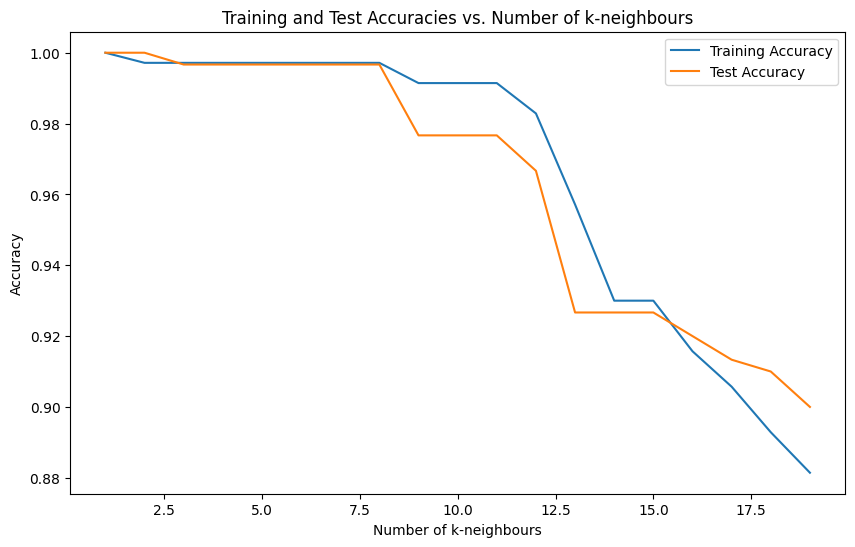

In [27]:
# Define the range of neighbors
k_neighbours_lst = range(1, 20)

def explore_kNN(k_neighbours_lst):
    global X_train, X_test, y_train, y_test
    train_lst=[]
    test_lst=[]


    for neighbour in k_neighbours_lst:
        knn = KNeighborsClassifier(n_neighbors=neighbour)
        knn.fit(X_train, y_train)
        train_preds=knn.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        test_preds=knn.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)

    print(k_neighbours_lst, train_lst)
    print(k_neighbours_lst, test_lst)
    plt.figure(figsize=(10, 6))
    plt.plot(k_neighbours_lst, train_lst, label="Training Accuracy")
    plt.plot(k_neighbours_lst, test_lst, label="Test Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Number of k-neighbours")
    plt.title("Training and Test Accuracies vs. Number of k-neighbours")
    plt.legend()
    plt.show()


explore_kNN(k_neighbours_lst)

Across the range of k values from 1 to 12, both test and training accuracies consistently remain high. This indicates that the model's ability to achieves perfect to almost-prefect accuracy on the test data when using these selected features and the range of hyperparameters. This suggests that the model's performance on unseen data (test set) is generally excellent. However, for optimal performance, we chose value of k=3 onwards as very small k of k=1 to 2 can lead to excessively high variance and overfitting for future dataset. 

However, beyond k=12, there is notable drop in test accuracy drop. This occurs because the larger "k" values results in the decision boundary to be too smooth, overlooking important patterns in the data, which leads to high bias and underfitting.

To conclude,  both models (logistic regression and KNN) exhibit excellent performance on the given dataset, even when using a subset of features selected based on pca, achieve almost-perfect accuracy on both training and test datasets for certain values of hyperparameters. These results suggest that the models are able to effectively capture the underlying patterns in the data and also validate that it generalise well to unseen data.

#### Archived

range(1, 20) [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9828571428571429, 0.9628571428571429, 0.9614285714285714, 0.9514285714285714, 0.94, 0.94, 0.95]
range(1, 20) [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9733333333333334, 0.9566666666666667, 0.9566666666666667, 0.95, 0.9433333333333334, 0.9433333333333334, 0.95]


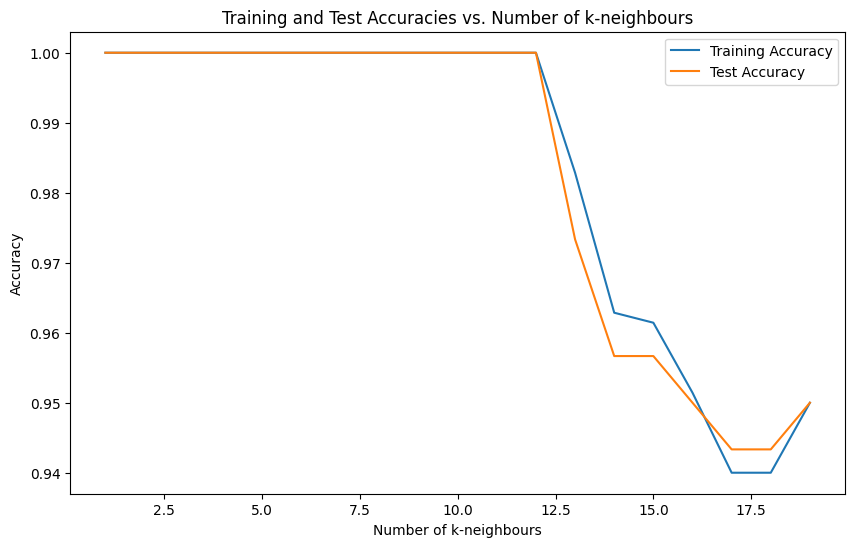

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
# display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
explore_kNN(k_neighbours_lst)
